In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
import tensorflow as  tf
from extensionbase import gen_extension_base
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



In [7]:
model = keras.Sequential([
    Conv2D(60, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(90, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10,  activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 60)        600       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 60)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 90)        48690     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 90)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4410)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [8]:
model.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# import extensionbase
# gen = extensionbase.gen_extension_base(x_train, y_train)
# loss = []
# for _ in range(100):
#     x, y = next(gen)
#     h = model.fit(x, y, batch_size=77)
#     loss.append(h.history["loss"][-1])
h =model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1032 - accuracy: 0.9681
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0353 - accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0128 - accuracy: 0.9959


In [9]:
model.save("Model_CNN_512_10", save_format="h5")

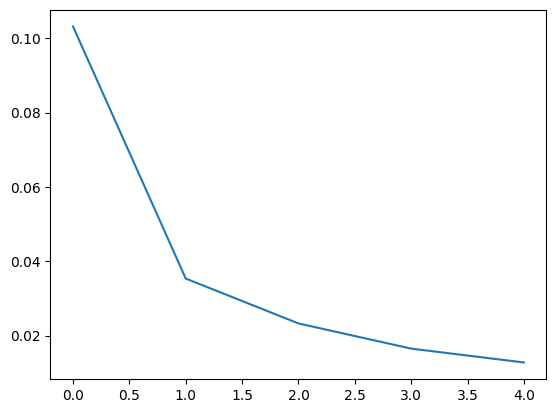

In [10]:
plt.plot(h.history["loss"])